# Problem Statement

This project will research and analyze data about coronavirus (COVID-19) in Vietnam and around the world.

Data is collected from the website: 
- Data world
https://github.com/owid/covid-19-data/tree/master/public/data
- Data Vietnam
https://covid19.gov.vn/
https://data.opendevelopmentmekong.net/dataset/coronavirus-covid-19-cases-in-vietnam/resource/d2967df9-3ef2-4d86-ad21-c14becf043fc


## Goal:
We need a strong model that predicts how the viruss could spread across different countries and regions. The goal of this task is to build a model that predicts the spread of the viruss in the next 7 day

## Tasks to be performed:
- Analysing the present COVID-19 condition in Vietnam
- Trend of new cases in Vietnam compared to other countries
- Exploring the world wide data
- Forecasting the world wide COVID-19 cases using Prophets
- Forecasting the number of COVID-19 cases in Vietnam using Prophet

### Import library

In [107]:
# import libraries:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
from prophet import Prophet

plt.rcParams['figure.figsize'] = 10,12

import warnings
warnings.filterwarnings('ignore')

### 1. Import data

#### 1.1 Data world

Đây là một bộ dữ liệu liên quan đến dịch COVID-19, được cung cấp bởi Our World in Data (OWID), một tổ chức nghiên cứu hợp tác quốc tế.

In [108]:
world_df = pd.read_csv('data_world/covid_19_clean_complete_1.csv')
world_df.head()

,Country/Region,Date,Confirmed,Deaths,Active,Recovered,Lat,Long
0,Afghanistan,15/02/2020,0,0,0,0,33.93911,67.709953
1,Afghanistan,16/02/2020,0,0,0,0,33.93911,67.709953
2,Afghanistan,17/02/2020,0,0,0,0,33.93911,67.709953
3,Afghanistan,18/02/2020,0,0,0,0,33.93911,67.709953
4,Afghanistan,19/02/2020,0,0,0,0,33.93911,67.709953


In [109]:
world_df.shape

(265825, 8)

This dataset includes 265,825 rows and 8 columns containing indicators and statistics related to the COVID-19 epidemic of countries from February 15, 2020 to April 12, 2024.

- `Country/Region`:  names of countries.                   
- `Date`:  Date of observation                           
- `Confirmed`: Total confirmed cases of COVID-19.      
- `Deaths`:  Total deaths attributed to COVID-19  
- `Recovered`:  This is the column containing the total number of cases recovered from COVID-19
- `Active`: This column contains the number of active cases               
- `Lat` and `Long`:  These columns contain the geographic coordinates (latitude and longitude) of the country's geographic location
  
                          

In [110]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265825 entries, 0 to 265824
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country/Region  265825 non-null  object 
 1   Date            265825 non-null  object 
 2   Confirmed       265825 non-null  int64  
 3   Deaths          265825 non-null  int64  
 4   Active          265825 non-null  int64  
 5   Recovered       265825 non-null  int64  
 6   Lat             265825 non-null  float64
 7   Long            265825 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 16.2+ MB


In [111]:
# Format the output using pandas options
# pd.set_option('display.float_format', '{:.6f}'.format)
# pd.set_option('display.float_format', None)
world_df.describe()

,Confirmed,Deaths,Active,Recovered,Lat,Long
count,2.658250e+05,2.658250e+05,2.658250e+05,2.658250e+05,265825.000000,265825.000000
mean,2.267387e+06,2.672890e+04,5.859348e+04,2.001381e+06,19.508663,14.530469
std,8.794163e+06,9.555696e+04,3.482189e+05,7.539166e+06,24.376855,63.114603
min,0.000000e+00,0.000000e+00,-4.129000e+03,0.000000e+00,-40.900600,-175.198242
25%,1.536800e+04,1.720000e+02,1.440000e+02,1.197600e+04,4.535300,-14.452400
50%,1.362200e+05,1.951000e+03,1.868000e+03,1.186160e+05,17.607789,19.145100
75%,1.001022e+06,1.198800e+04,1.493100e+04,9.654690e+05,40.143100,46.199616
max,1.118201e+08,1.219487e+06,1.813859e+07,1.098144e+08,71.706900,178.065000


- Số liệu trung bình là khoảng 2,086,489 ca, với sự biến động lớn (độ lệch chuẩn khoảng 7,792,459), cho thấy sự lan rộng mạnh mẽ của virus trên toàn cầu. Số lượng ca nhiễm xác nhận cao nhất là khoảng 111,820,100 ca
- Trung bình có khoảng 26,510 ca tử vong, với độ lệch chuẩn khoảng 95,486 ca. Số liệu này chỉ ra tác động nghiêm trọng của dịch bệnh lên tính mạng của con người. Số ca tử vong cao nhất là khoảng 1,219,487 ca, đây là con số đáng lo ngại về tình hình dịch bệnh trên toàn cầu.
- Trung bình có khoảng 58,593 ca nhiễm đang điều trị, với sự biến động lớn (độ lệch chuẩn khoảng 348,219). Số ca nhiễm đangđiều trị cao nhất là khoảng 18,138,590 ca, là một con số đáng lo ngại về khả năng lây lan và tác động tiềm ẩn lên hệ thống y tế.
- Trung bình có khoảng 2,001,381 ca đã hồi phục. Số ca đã hồi phục cao nhất là khoảng 109,814,400 ca.

#### 1.2 Data Vietnam

Dữ liệu của Việt Nam sẽ sử dụng đến file:
- `case_in_Vietnam.csv`: đây là file chứa các thông tin về Total cases, New Cases, Death,.. ở mỗi tỉnh, bộ dữ liệu này được thu thập từ trang web của Bộ Y tế và được cập nhật đến năm 2023.

In [112]:
vietnam_df = pd.read_csv('data_vn/cases_in_Vietnam.csv')
vietnam_df.head()

,HASC,Region code,Province,Total cases,New Cases,Death,Lat,Long
0,VN.AG,VN-44,An Giang,43297,0,1325,10.5216,105.1259
1,VN.BV,VN-43,Ba Ria - Vung Tau,110822,2,497,10.4963,107.1684
2,VN.BG,VN-54,Bac Giang,391440,0,92,21.2670,106.2000
3,VN.BK,VN-53,Bac Kan,77048,2,19,22.1333,105.8333
4,VN.BL,VN-55,Bac Lieu,46949,0,470,9.2804,105.7200


In [113]:
vietnam_df.shape

(63, 8)

In [114]:
vietnam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HASC         63 non-null     object 
 1   Region code  63 non-null     object 
 2   Province     63 non-null     object 
 3   Total cases  63 non-null     int64  
 4   New Cases    63 non-null     int64  
 5   Death        63 non-null     int64  
 6   Lat          63 non-null     float64
 7   Long         63 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 4.1+ KB


Dataset `case_in_Vietnam.csv`gồm 63 hàng và 4 cột:
- `HASC`: là mã định danh dùng để xác định một khu vực cụ thể theo một hệ thống định danh chuẩn.
- `Region code`: mã của các tỉnh/thành phố
- `Province`: tên của các tỉnh/thành phố
- `Total cases`: tổng ca nhiễm tích lũy
- `New Cases`: ca nhiễm mới tính tới thời điểm cập nhật bộ dữ liệu này
- `Death`: số ca tử vong tích lũy

In [115]:
vietnam_df.describe()

,Total cases,New Cases,Death,Lat,Long
count,6.300000e+01,63.000000,63.000000,63.000000,63.000000
mean,1.833309e+05,2.317460,679.301587,16.080011,106.371240
std,2.321020e+05,4.294878,2537.823055,4.920252,1.357543
min,9.001000e+03,0.000000,0.000000,9.177400,103.032200
25%,6.312000e+04,0.000000,62.500000,11.079500,105.680650
50%,1.087120e+05,0.000000,137.000000,16.074800,106.200000
75%,2.143935e+05,3.000000,476.000000,21.019850,107.184200
max,1.646923e+06,26.000000,19985.000000,22.833700,109.107700


- Trung bình số trường hợp nhiễm trên mỗi tỉnh là khoảng 183,330, với một phạm vi rất rộng từ 9,001 đến 1,646,923. Sự biến động giữa các tỉnh là lớn, với độ lệch chuẩn là khoảng 232,102, cho thấy sự đa dạng lớn về mức độ nhiễm.
- Trung bình số trường hợp nhiễm mới hàng ngày trên mỗi tỉnh là khoảng 2.32, với một phạm vi từ 0 đến 26, với độ lệch chuẩn là khoảng 4.29, chỉ ra sự biến động đáng kể giữa các tỉnh.
- Trung bình số ca tử vong trên mỗi tỉnh là khoảng 679.30, với một phạm vi từ 0 đến 19,985. Sự biến động giữa các tỉnh về số ca tử vong cũng rất lớn, với độ lệch chuẩn là khoảng 2,537.82.

Dữ liệu này cho thấy sự đa dạng lớn trong mức độ nhiễm và tử vong giữa các tỉnh, với một số tỉnh ghi nhận số ca cao và nghiêm trọng, trong khi các tỉnh khác có số liệu thấp hơn.

### 2. Data Cleaning
Clone a copy of the original dataset to keep it saparated.

#### 2.1 World Data

In [116]:
df = world_df.copy()

##### Data Duplication

In [117]:
dup_ind = df.duplicated()
df[dup_ind]

,Country/Region,Date,Confirmed,Deaths,Active,Recovered,Lat,Long


There are no duplicate rows in the data frame, all rows are unique

##### Missing Data

In [118]:
df.isnull().sum()

Country/Region    0
Date              0
Confirmed         0
Deaths            0
Active            0
Recovered         0
Lat               0
Long              0
dtype: int64

In [119]:
df.isnull().sum()*100/df.shape[0]

Country/Region    0.0
Date              0.0
Confirmed         0.0
Deaths            0.0
Active            0.0
Recovered         0.0
Lat               0.0
Long              0.0
dtype: float64

The output shows that most of the columns have no missing values, as indicated by the percentage being 0.000000. However, there are some columns with missing values, such as continent with 4.41% missing values and population_density with 14.81% missing values.

The `continent` column has 16,453 missing values out of a total of 371,453 rows, which is a relatively small percentage of the total data and the `population_density` column has 54,567 missing values,

##### Remove unnecessary columns

In [120]:
df.drop(['Lat','Long'], axis = 1, inplace = True)
df.shape

(265825, 6)

##### Change the datatype of `Date` from string to datetime

In [121]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Date'].head()

0   2020-02-15
1   2020-02-16
2   2020-02-17
3   2020-02-18
4   2020-02-19
Name: Date, dtype: datetime64[ns]

##### Rename the Country/Region column to Country

In [122]:
df = df.rename(columns={'Country/Region': 'Country'})

In [123]:
df.head()

,Country,Date,Confirmed,Deaths,Active,Recovered
0,Afghanistan,2020-02-15,0,0,0,0
1,Afghanistan,2020-02-16,0,0,0,0
2,Afghanistan,2020-02-17,0,0,0,0
3,Afghanistan,2020-02-18,0,0,0,0
4,Afghanistan,2020-02-19,0,0,0,0


#### 2.2 Vietnam Data
Tạo bản sao cho dữ liệu Việt Nam trước khi cleaning data

In [124]:
df_vn = vietnam_df.copy()

##### Data Duplication

In [125]:
dup_ind = df_vn.duplicated()
df_vn[dup_ind]

,HASC,Region code,Province,Total cases,New Cases,Death,Lat,Long


Kết quả đầu ra cho thấy không có dữ liệu nào trùng lặp

##### Missing Data

In [126]:
df_vn.isnull().sum()*100/df.shape[0]

HASC           0.0
Region code    0.0
Province       0.0
Total cases    0.0
New Cases      0.0
Death          0.0
Lat            0.0
Long           0.0
dtype: float64

Không có dữ liệu bị thiếu trong bộ dữ liệu này

##### Remove unnecessary columns

In [127]:
df_vn.drop(['HASC','Region code'], axis = 1, inplace = True)
df_vn.shape

(63, 6)

In [128]:
df_vn.head()

,Province,Total cases,New Cases,Death,Lat,Long
0,An Giang,43297,0,1325,10.5216,105.1259
1,Ba Ria - Vung Tau,110822,2,497,10.4963,107.1684
2,Bac Giang,391440,0,92,21.2670,106.2000
3,Bac Kan,77048,2,19,22.1333,105.8333
4,Bac Lieu,46949,0,470,9.2804,105.7200


### 3. Exploratory Data Analysis

After cleaning the data, I would like to explore the dataset by answering the following questions:
1. What is the distribution of COVID-19 cases and deaths across continents and countries?
2. Which country have the highest and lowest number of cases and deaths?
3. Which continents have the highest and lowest number of cases and deaths?
4. How have the total and new cases, as well as total and new deaths, changed over time?
5. Are there any anomalies or unusual patterns in the data, such as sudden spikes or drops in cases or deaths?
6. How does the population density affect the number of cases and deaths?
7. Is there a correlation between the date and the number of cases and deaths?
8. Is there a correlation between population density and the number of cases or deaths?


#### Part 1: Analysing the present COVID-19 condition in Vietnam

##### Analysing COVID 19 Cases in Vietnam

In [129]:
# Create a new attribute of 'Total case'
total_cases = df_vn['Total cases'].sum()
print('Total number of confirmed COVID 19 cases across Vietnam till date (April 2024):', total_cases )

Total number of confirmed COVID 19 cases across Vietnam till date (April 2024): 11549848


In [130]:
data = df_vn[['Province', 'Total cases', 'New Cases', 'Death']]
data.sort_values('Total cases', ascending = False, inplace = True)
data.style.background_gradient()  

,Province,Total cases,New Cases,Death
23,Ha Noi,1646923,2,1232
28,Ho Chi Minh,629018,3,19985
26,Hai Phong,537527,11,145
40,Nghe An,502049,11,145
2,Bac Giang,391440,0,92
61,Vinh Phuc,375686,0,19
25,Hai Duong,372391,5,117
48,Quang Ninh,356404,7,150
5,Bac Ninh,353869,0,136
54,Thai Nguyen,347519,1,112


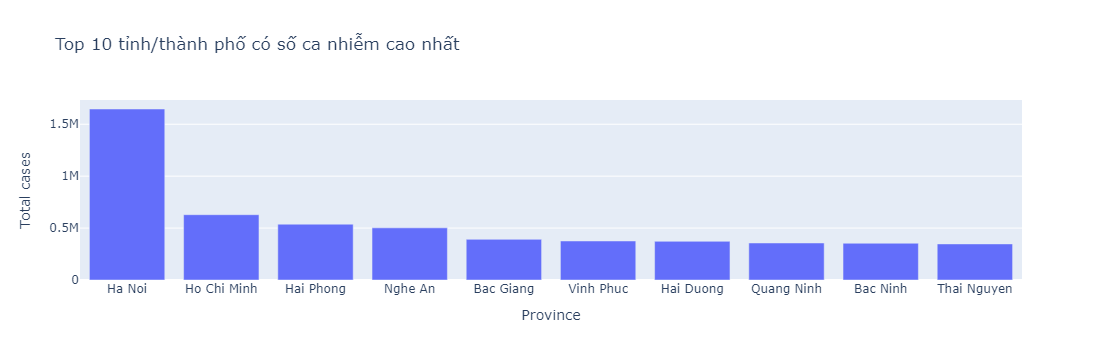

In [131]:
# Biểu đồ cột
fig1 = px.bar(data.head(10), x='Province', y='Total cases', title='Top 10 tỉnh/thành phố có số ca nhiễm cao nhất')
fig1.show()

Từ số liệu, tổng số ca nhiễm tính đến hiện tại là khá cao và đang tiếp tục tăng lên. Số ca nhiễm cao nhất thuộc về Hà Nội với hơn 1,646,923 ca, tiếp theo là thành phố Hồ Chí Minh với hơn 629,018 ca. Cả hai thành phố đều ghi nhận số ca nhiễm đáng kể.

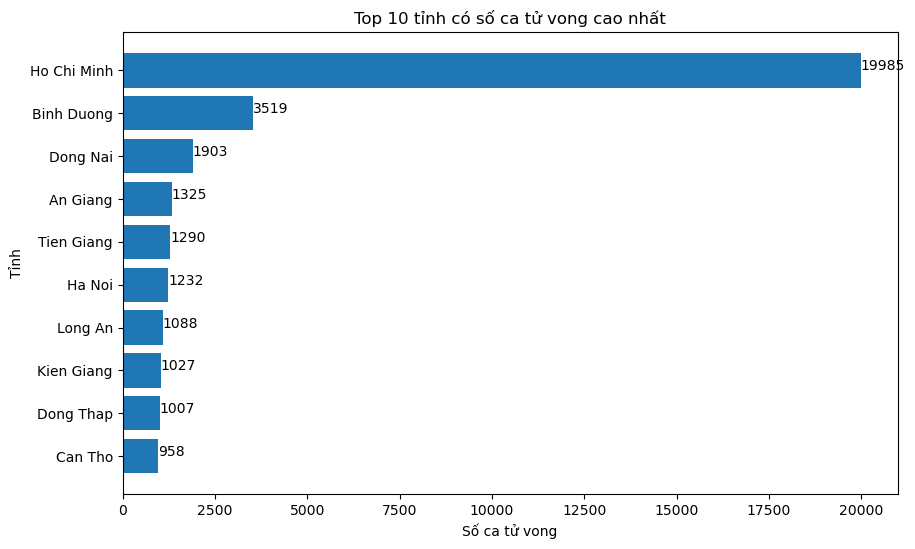

In [132]:
top_10_death_province = df_vn.sort_values(by='Death', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_death_province['Province'], top_10_death_province['Death'])

# Hiển thị số liệu lên biểu đồ
for index, value in enumerate(top_10_death_province['Death']):
    plt.text(value, index, str(value))

plt.xlabel('Số ca tử vong')
plt.ylabel('Tỉnh')
plt.title('Top 10 tỉnh có số ca tử vong cao nhất')
plt.gca().invert_yaxis()
plt.show()


Các tỉnh/thành phố ghi nhận số ca tử vong cao nhất là Hồ Chí Minh (19,985 ca), tiếp theo là Bình Dương (3,519 ca) và Đồng Nai (1,903 ca). Các tỉnh/thành phố khác cũng ghi nhận một số ca tử vong, tuy nhiên, số lượng này thấp hơn so với các địa điểm nêu trên. Điều này có thể phản ánh sự tập trung của dịch bệnh trong các thành phố lớn.



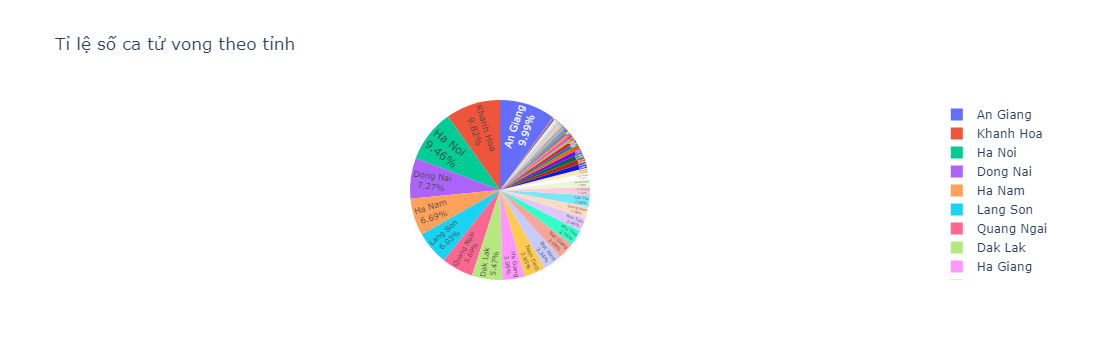

In [133]:
# Tính tỷ lệ tử vong cho mỗi tỉnh
death_rate = (df_vn['Death']/ df_vn['Total cases']) * 100

# print("Tỷ lệ tử vong của Việt Nam: ")."{:.1f}%".format(death_rate)
fig2 = px.pie(data, values=death_rate, names='Province', title='Tỉ lệ số ca tử vong theo tỉnh')
# Thiết lập ghi chú
fig2.update_traces(textposition='inside', textinfo='percent+label', insidetextorientation='radial')
fig2.show()

#####  Visualising the spread geographically

In [134]:
map = folium.Map(location=[14.0583, 108.2772], zoom_start=5)

# Thêm các CircleMarker vào bản đồ
for lat, lon, value, name in zip(df_vn['Lat'], df_vn['Long'], df_vn['Total cases'], df_vn['Province']):
    folium.CircleMarker(
        location=[lat, lon],
        radius=value * 0.0001,
        color='red',
        fill_color='red',
        fill_opacity=0.3,
        popup = ('<strong>State</strong>: '+ str(name).capitalize() +  '<br><strong>Total Cases</strong>: ' + str(value) )
    ).add_to(map)

map

#### Part 2: Trend of new cases in Vietnam compared to other countries

In [135]:
# Lọc data của các nước trong tập dữ liệu thế giới
vietnam_data = df.query('Country == "Vietnam"')
china_data = df.query('Country == "China"')
thailand_data = df.query('Country == "Thailand"')
india_data = df.query('Country == "India"')

vietnam_data

,Country,Date,Confirmed,Deaths,Active,Recovered
259749,Vietnam,2020-02-15,16,0,9,7
259750,Vietnam,2020-02-16,16,0,9,7
259751,Vietnam,2020-02-17,16,0,9,7
259752,Vietnam,2020-02-18,16,0,9,7
259753,Vietnam,2020-02-19,16,0,2,14
...,...,...,...,...,...,...
261263,Vietnam,2024-04-08,11619990,43206,935813,10640971
261264,Vietnam,2024-04-09,11619990,43206,935813,10640971
261265,Vietnam,2024-04-10,11619990,43206,935813,10640971
261266,Vietnam,2024-04-11,11619990,43206,935813,10640971


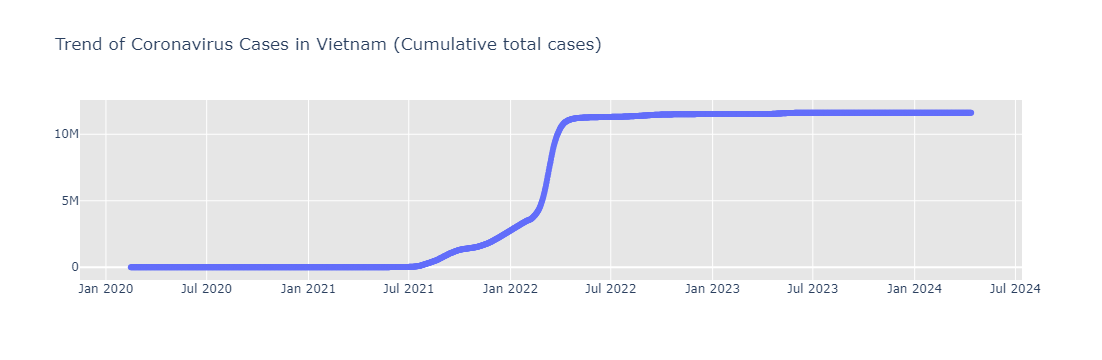

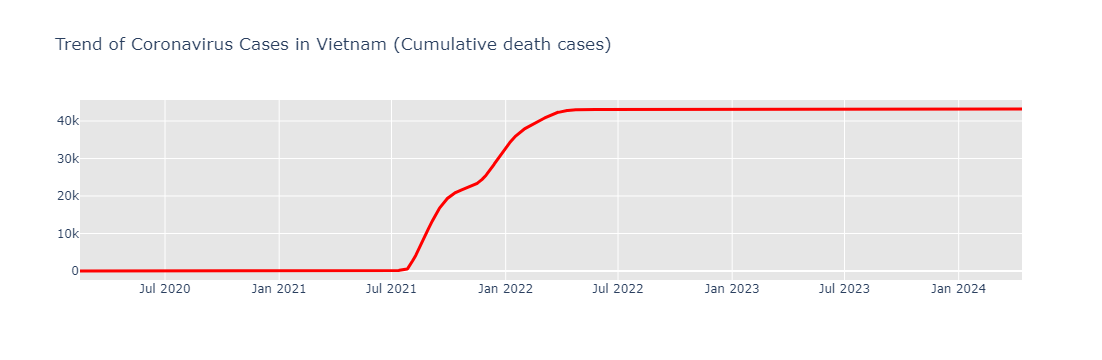

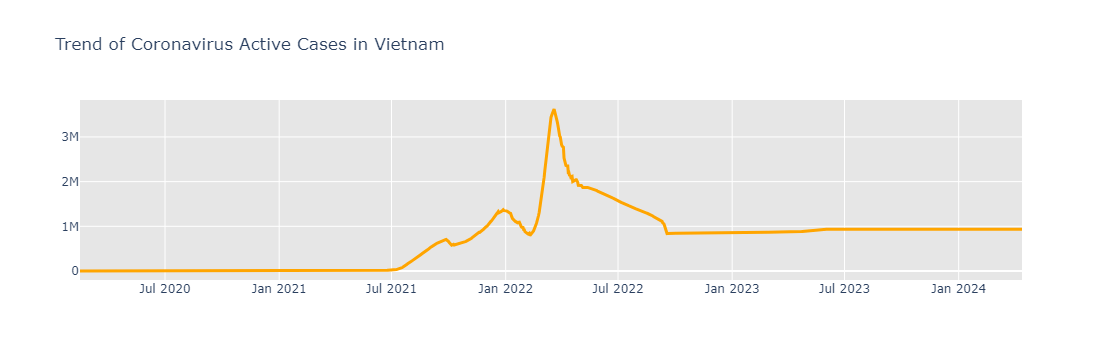

In [136]:
#Rise of COVID-19 cases in Vietnam
fig = go.Figure()
fig.add_trace(go.Scatter(x = vietnam_data['Date'], y = vietnam_data['Confirmed'], mode = 'lines + markers', name = 'Confirmed Cases'))
fig.update_layout(title_text = 'Trend of Coronavirus Cases in Vietnam (Cumulative total cases)', plot_bgcolor = 'rgb(230,230,230)')
fig.show()

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x = vietnam_data['Date'], y = vietnam_data['Deaths'], mode = 'lines', name = 'Death Cases',line=dict(color='red', width=3)))
fig1.update_layout(title_text = 'Trend of Coronavirus Cases in Vietnam (Cumulative death cases)', plot_bgcolor = 'rgb(230,230,230)')
fig1.show()

fig1 = go.Figure()
fig1.add_trace(go.Scatter(x = vietnam_data['Date'], y = vietnam_data['Active'], mode = 'lines', name = 'Death Cases',line=dict(color='orange', width=3)))
fig1.update_layout(title_text = 'Trend of Coronavirus Active Cases in Vietnam', plot_bgcolor = 'rgb(230,230,230)')
fig1.show()


Dựa trên biểu đồ tổng ca tích lũy về COVID-19 ở Việt Nam, có thể thấy rằng tình hình dịch bệnh đã trải qua một số giai đoạn khác nhau. Từ tháng 8/2021 đến tháng 7/2022, số ca nhiễm tăng đột ngột, vượt hơn 10M. Sau đó, số ca nhiễm tăng ít trong những tháng tiếp theo. Biểu đồ cho thấy số ca nhiễm covid-19 ở Việt Nam có xu hướng ổn định và tăng ít

In [137]:
# New COVID-19 cases reported daily in Vietnam
# fig = px.line(vietnam_data, x="date", y="new_cases", title='New COVID-19 cases reported daily in Vietnam',height=600)
# fig.update_layout(plot_bgcolor='rgb(230,230,230)', xaxis=dict(tickformat="%d-%m-%y"))
# fig.show()

##### Comparasion between the rise of cases in China, S.Korea and Vietnam

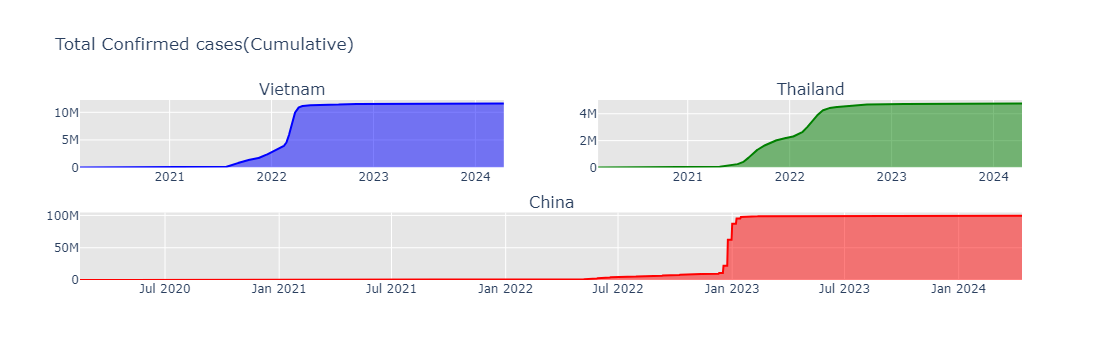

In [138]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Vietnam", "Thailand", "China", "India")
)

fig.add_trace(go.Scatter(x=vietnam_data['Date'], y=vietnam_data['Confirmed'], mode='lines', fill='tozeroy',
                         line=dict(color='blue', width=2), name='Vietnam'),1, 1)

fig.add_trace(go.Scatter(x=thailand_data['Date'], y=thailand_data['Confirmed'], mode='lines', fill='tozeroy',
                         line=dict(color='green', width=2), name='Thailand'),1, 2)

fig.add_trace(go.Scatter(x=china_data['Date'], y=china_data['Confirmed'], mode='lines', fill='tozeroy',
                         line=dict(color='red', width=2), name='China'), 2, 1)

# fig.add_trace(go.Scatter(x=india_data['Date'], y=india_data['Confirmed'], mode='lines', fill='tozeroy',
#                          line=dict(color='orange', width=2), name='India'), 3, 1)

fig.update_layout(showlegend=False, title_text="Total Confirmed cases(Cumulative)")
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()




In [139]:
#Day by day of Vietnam, Korea, Italy, and Wuhan
dbd_Vietnam = pd.read_excel('data_vn/per_day_cases.xlsx', parse_dates = True, sheet_name='Vietnam')
dbd_India = pd.read_excel('data_vn/per_day_cases.xlsx', parse_dates = True, sheet_name='India')
dbd_Korea = pd.read_excel('data_vn/per_day_cases.xlsx', parse_dates = True, sheet_name='Korea')
dbd_China = pd.read_excel('data_vn/per_day_cases.xlsx', parse_dates = True, sheet_name='China')

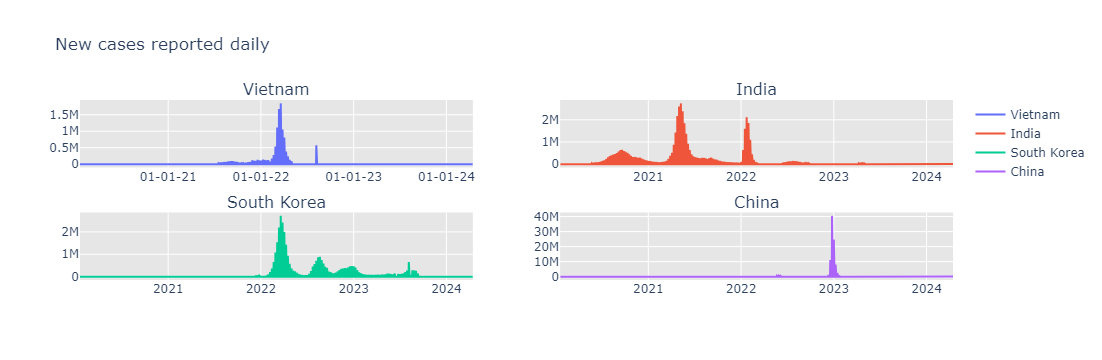

In [140]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Vietnam","India", "South Korea", "China")
)

fig.add_trace(go.Scatter(x=dbd_Vietnam["Date"], y=dbd_Vietnam["New Cases"], mode='lines', name='Vietnam'), row=1, col=1)
fig.add_trace(go.Scatter(x=dbd_India["Date"], y=dbd_India["New Cases"], mode='lines', name='India'), row=1, col=2)
fig.add_trace(go.Scatter(x=dbd_Korea["Date"], y=dbd_Korea["New Cases"], mode='lines', name='South Korea'), row=2, col=1)
fig.add_trace(go.Scatter(x=dbd_China["Date"], y=dbd_China["New Cases"], mode='lines', name='China'), row=2, col=2)

# Cập nhật layout của biểu đồ.
fig.update_layout(showlegend=True, title_text="New cases reported daily", plot_bgcolor='rgb(230,230,230)', xaxis=dict(tickformat="%d-%m-%y"))

# Hiển thị biểu đồ.
fig.show()

#### Part 3: Exploring World wide data

##### Overall worldwide Confirmed and Deaths cases

In [141]:
df.groupby('Date').sum().tail().drop(['Country'], axis=1)

,Confirmed,Deaths,Active,Recovered
Date,,,,
2024-04-08,743587030,6925148,6576585,631356654
2024-04-09,743609617,6925261,6573042,631382671
2024-04-10,743612639,6925305,6566373,631392318
2024-04-11,743615150,6925332,6561381,631399794
2024-04-12,743617681,6925355,6549671,631414012


##### Visualizing: Worldwide NCOVID-19 cases

In [142]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()
active = df.groupby('Date').sum()['Active'].reset_index()

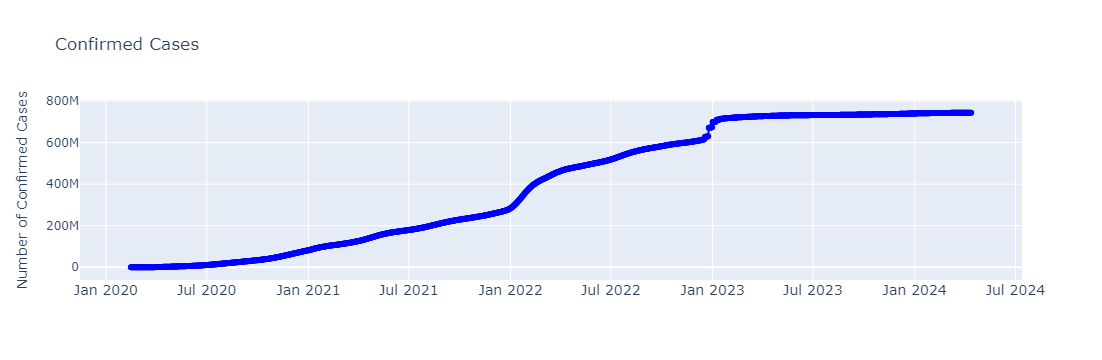

In [143]:
# Tạo biểu đồ cho Confirmed
fig_confirmed = go.Figure()
fig_confirmed.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed', line=dict(color='blue', width=2)))
fig_confirmed.update_layout(title='Confirmed Cases', xaxis_tickfont_size=14, yaxis=dict(title='Number of Confirmed Cases'))
fig_confirmed.show()

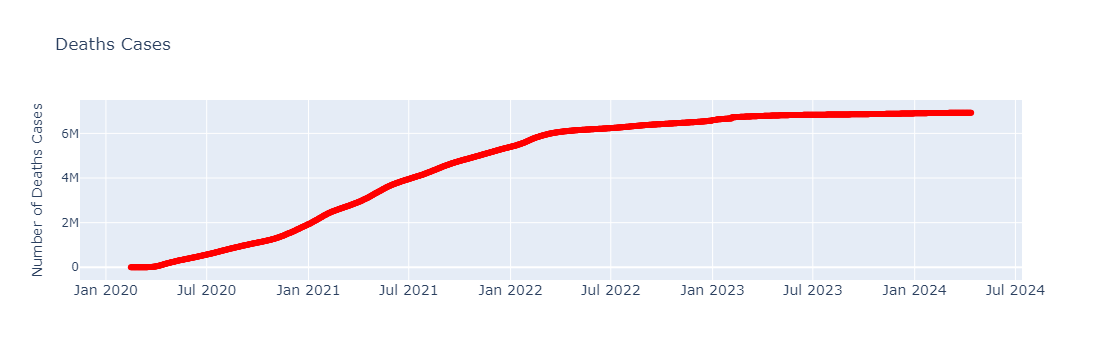

In [144]:
# Tạo biểu đồ cho Deaths
fig_deaths = go.Figure()
fig_deaths.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='red', width=2)))
fig_deaths.update_layout(title='Deaths Cases', xaxis_tickfont_size=14, yaxis=dict(title='Number of Deaths Cases'))
fig_deaths.show()

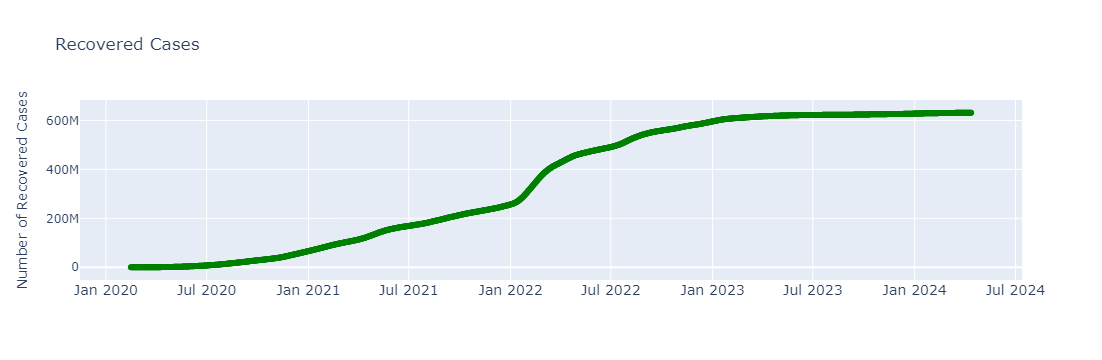

In [145]:
# Tạo biểu đồ cho Recovered
fig_recovered = go.Figure()
fig_recovered.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Confirmed', line=dict(color='green', width=2)))
fig_recovered.update_layout(title='Recovered Cases', xaxis_tickfont_size=14, yaxis=dict(title='Number of Recovered Cases'))
fig_recovered.show()

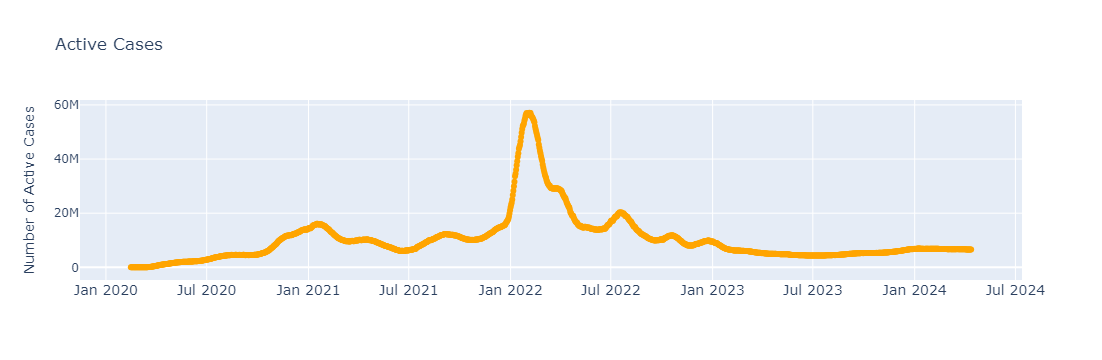

In [146]:
# Tạo biểu đồ cho Active
fig_active = go.Figure()
fig_active.add_trace(go.Scatter(x=active['Date'], y=active['Active'], mode='lines+markers', name='Active', line=dict(color='orange', width=2)))
fig_active.update_layout(title='Active Cases', xaxis_tickfont_size=14, yaxis=dict(title='Number of Active Cases'))
fig_active.show()

##### Top 10 countries with the highest Confirmed cases

In [147]:
# Lấy tổng số ca nhiễm và tổng số tử vong cập nhật lần cuối của mỗi quốc gia
total_cases_by_country = df.groupby("Country")["Confirmed"].last()

# Tạo DataFrame từ dữ liệu
top_total_cases = pd.DataFrame({
    "Country": total_cases_by_country.index,
    "Confirmed": total_cases_by_country.values,
})

# Sắp xếp giảm dần theo tổng số ca nhiễm
top_total_cases = top_total_cases.sort_values(by="Confirmed", ascending=False)

# Chọn 10 quốc gia đầu tiên
top_total_cases.head(10).style.background_gradient()  

,Country,Confirmed
166,United States,111820082
33,China,99348816
71,India,45002015
54,France,40138560
58,Germany,38828995
21,Brazil,38743918
79,Japan,33803572
77,Italy,26723249
165,United Kingdom,24910387
129,Russia,24124215


The United States tops the list with more than 111 million infections, the country with the highest number of infections.
India ranked second with more than 45 million infections. France is in third place with more than 40 million infections.
Germany and Brazil have more than 38 million cases respectively. Japan, Italy and the United Kingdom are also in the top 10 with cases ranging from 24 million to 34 million respectively.

##### Top 10 countries with the highest Deaths cases

In [148]:
total_deaths_by_country = df.groupby("Country")["Deaths"].last()
top_total_deaths = pd.DataFrame({
    "Country": total_cases_by_country.index,
    "Deaths": total_deaths_by_country.values
})
print("Top 10 countries with the highest Deaths cases")
top_total_deaths = top_total_deaths.sort_values(by="Deaths", ascending=False)
top_total_deaths.head(10).style.background_gradient()  

Top 10 countries with the highest Deaths cases


,Country,Deaths
166,United States,1219487
21,Brazil,711380
71,India,533570
129,Russia,402756
102,Mexico,334958
165,United Kingdom,232112
123,Peru,222161
77,Italy,196487
58,Germany,183027
54,France,167642


##### Top 10 countries with the lowest total_cases

In [149]:
total_cases_by_country = df.groupby("Country")["Confirmed"].last()

top_total_cases = pd.DataFrame({
    "Country": total_cases_by_country.index,
    "Confirmed": total_cases_by_country.values,
})

top_total_cases = top_total_cases.sort_values(by="Confirmed", ascending=True)
top_total_cases.head(10).style.background_gradient()  

,Country,Confirmed
131,Saint Kitts and Nevis,6607
135,Sao Tome and Principe,6778
31,Chad,7701
140,Sierra Leone,7779
89,Liberia,8090
5,Antigua and Barbuda,9106
65,Guinea-Bissau,9614
114,Niger,9931
48,Eritrea,10189
172,Yemen,11945


In [150]:
# df['total_cases'].hist()
# df['new_cases'].hist()
# df['total_deaths'].hist()

### 4. Forecasting Total Number of Cases Worldwide
- Prophet
- Why Prophet?

1. Forecasting Cofirmed COVID-19 Cases Worldwide with Prophet
2. Forecasting Deaths Cases Worldwide with Prophet
3. Forecasting Recovered Cases Worldwide with Prophet
4. Inference from the above Analysis and Forecast

#### Prophet
Prophet is open source software released by Facebook's Core Data Science team. It is available for download on CRAN and PyPI. We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

#### Why Prophet?
Accurate and fast: Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in Stan so that you get forecasts in just a few seconds.
Fully automatic: Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series
Tunable forecasts: The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human- interpretable parameters to improve your forecast by adding your domai knowledge.
Available in R or Python: Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you're comfortable with to get forecasts.

In [151]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

#### 4.1. Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (base model)
Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors

The input to Prophet is always a dataframe with two columns: ds and y. The ds(datestamp) columns should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast

In [152]:
#Đổi tên cột
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [153]:
confirmed.tail().apply(lambda x: x.dt.strftime('%Y-%m-%d') if x.name == 'ds' else x.apply('{:,.0f}'.format))

,ds,y
1514,2024-04-08,"743,587,030"
1515,2024-04-09,"743,609,617"
1516,2024-04-10,"743,612,639"
1517,2024-04-11,"743,615,150"
1518,2024-04-12,"743,617,681"


In [154]:
m = Prophet(interval_width = 0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods = 200)
future.tail(7)

17:05:43 - cmdstanpy - INFO - Chain [1] start processing
17:05:44 - cmdstanpy - INFO - Chain [1] done processing


,ds
1712,2024-10-23
1713,2024-10-24
1714,2024-10-25
1715,2024-10-26
1716,2024-10-27
1717,2024-10-28
1718,2024-10-29


Tham số **interval_width** trong Prophet xác định tỉ lệ độ rộng của khoảng tin cậy (confidence interval) cho dự đoán. Khoảng tin cậy là một phạm vi ước lượng xác suất cho kết quả dự đoán.

Khi interval_width = 0.95, điều này có nghĩa là Prophet sẽ tạo ra khoảng tin cậy 95% cho các dự đoán. Nói cách khác, mỗi dự đoán được tạo ra sẽ đi kèm với hai giới hạn dưới và trên, sao cho có 95% khả năng mà giá trị thực tế sẽ nằm trong khoảng đó.

The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as column for components and uncertainty intervals

In [155]:
forecast_confirmed = m.predict(future)
forecast_confirmed[['ds','yhat','yhat_lower','yhat_upper']].tail().apply(lambda x: x.dt.strftime('%Y-%m-%d') if x.name == 'ds' else x.apply('{:,.0f}'.format))

,ds,yhat,yhat_lower,yhat_upper
1714,2024-10-25,"746,609,863","467,005,191","997,458,858"
1715,2024-10-26,"746,459,603","469,418,288","1,000,836,328"
1716,2024-10-27,"746,775,896","466,034,114","1,000,523,387"
1717,2024-10-28,"746,579,474","463,671,243","1,004,516,024"
1718,2024-10-29,"746,488,506","459,706,888","1,003,880,074"


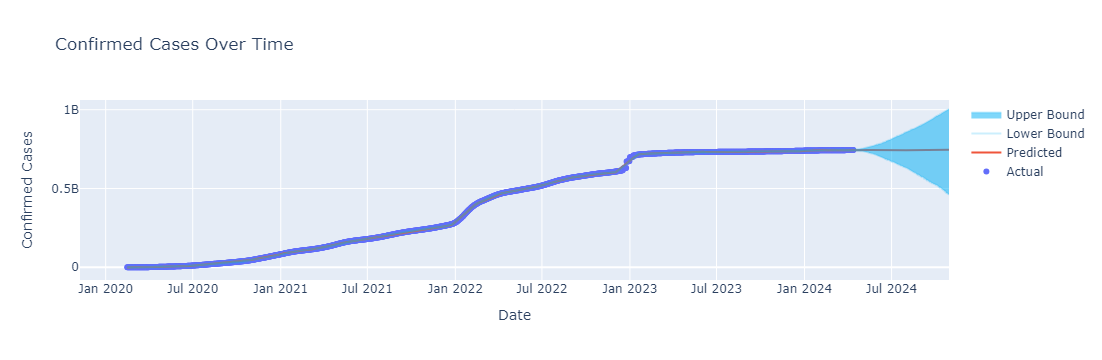

In [156]:
# Vẽ biểu đồ
fig = make_subplots(rows=1, cols=1)

# Dữ liệu thực tế
trace1 = go.Scatter(x=confirmed['ds'], y=confirmed['y'], mode='markers', name='Actual')

# Dự đoán
trace2 = go.Scatter(x=forecast_confirmed['ds'], y=forecast_confirmed['yhat'], mode='lines', name='Predicted')

# Dải tin cậy
trace3 = go.Scatter(x=forecast_confirmed['ds'], y=forecast_confirmed['yhat_lower'], mode='lines', fill=None, line=dict(color='rgba(0,176,246,0.2)'), name='Lower Bound')
trace4 = go.Scatter(x=forecast_confirmed['ds'], y=forecast_confirmed['yhat_upper'], mode='lines', fill='tonexty', line=dict(color='rgba(0,176,246,0.2)'), name='Upper Bound')

fig.add_trace(trace1)
fig.add_trace(trace2)
fig.add_trace(trace3)
fig.add_trace(trace4)

# Cài đặt tiêu đề và trục
fig.update_layout(title='Confirmed Cases Over Time',
                  xaxis_title='Date',
                  yaxis_title='Confirmed Cases')

# Hiển thị biểu đồ
fig.show()

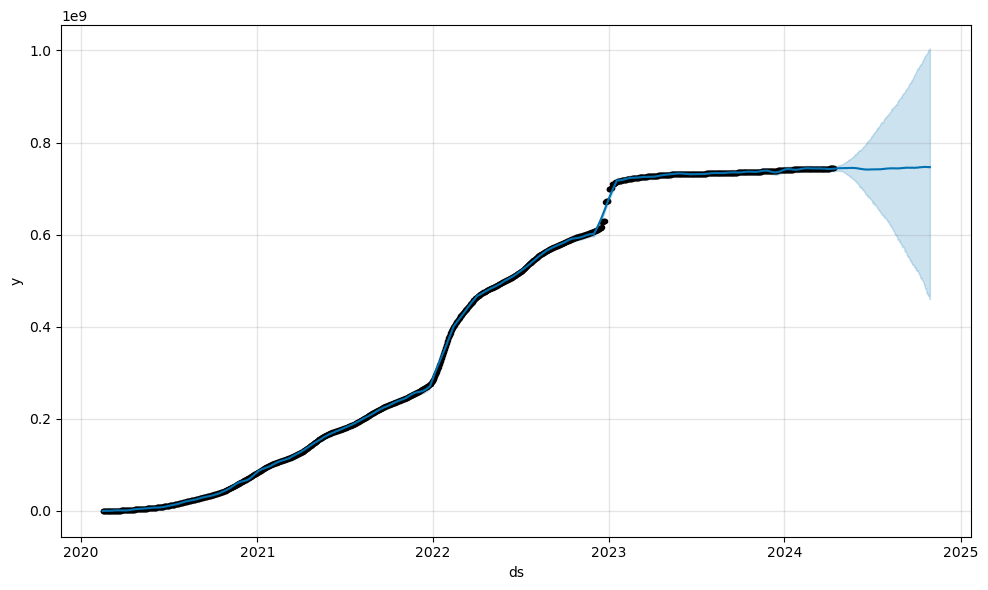

In [157]:
confirmed_forecast_plot = m.plot(forecast_confirmed)

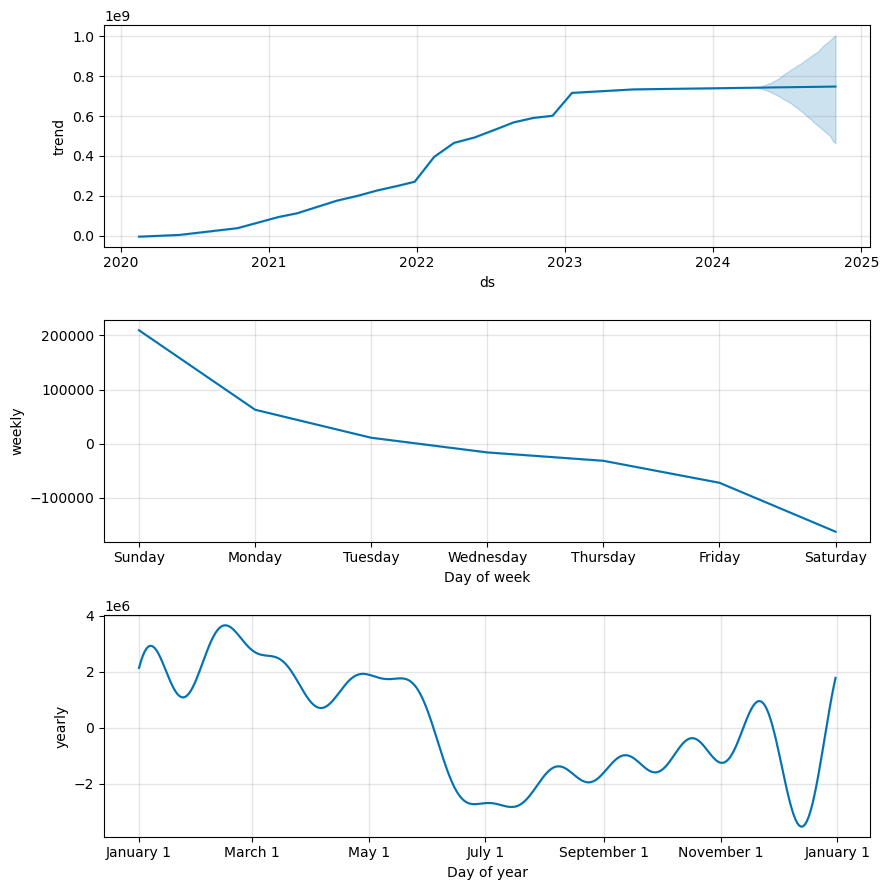

In [158]:
confirmed_forecast_plot = m.plot_components(forecast_confirmed)

#### 4.2 Forecasting Worldwide deaths using Prophet (Base model)
Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors

In [159]:
deaths.tail(10)

,Date,Deaths
1509,2024-04-03,6924893
1510,2024-04-04,6924941
1511,2024-04-05,6925008
1512,2024-04-06,6925055
1513,2024-04-07,6925120
1514,2024-04-08,6925148
1515,2024-04-09,6925261
1516,2024-04-10,6925305
1517,2024-04-11,6925332
1518,2024-04-12,6925355


In [160]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [161]:
m = Prophet(interval_width = 0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods = 200)
future.tail()

17:05:45 - cmdstanpy - INFO - Chain [1] start processing
17:05:46 - cmdstanpy - INFO - Chain [1] done processing


,ds
1714,2024-10-25
1715,2024-10-26
1716,2024-10-27
1717,2024-10-28
1718,2024-10-29


In [162]:
forecast_deaths = m.predict(future)
forecast_deaths[['ds', 'yhat','yhat_lower','yhat_upper']].tail().apply(lambda x: x.dt.strftime('%Y-%m-%d') if x.name == 'ds' else x.apply('{:,.0f}'.format))

,ds,yhat,yhat_lower,yhat_upper
1714,2024-10-25,"7,027,594","5,924,165","8,164,373"
1715,2024-10-26,"7,027,227","5,923,795","8,183,195"
1716,2024-10-27,"7,026,758","5,901,423","8,171,732"
1717,2024-10-28,"7,025,880","5,914,221","8,182,652"
1718,2024-10-29,"7,026,100","5,880,298","8,197,106"


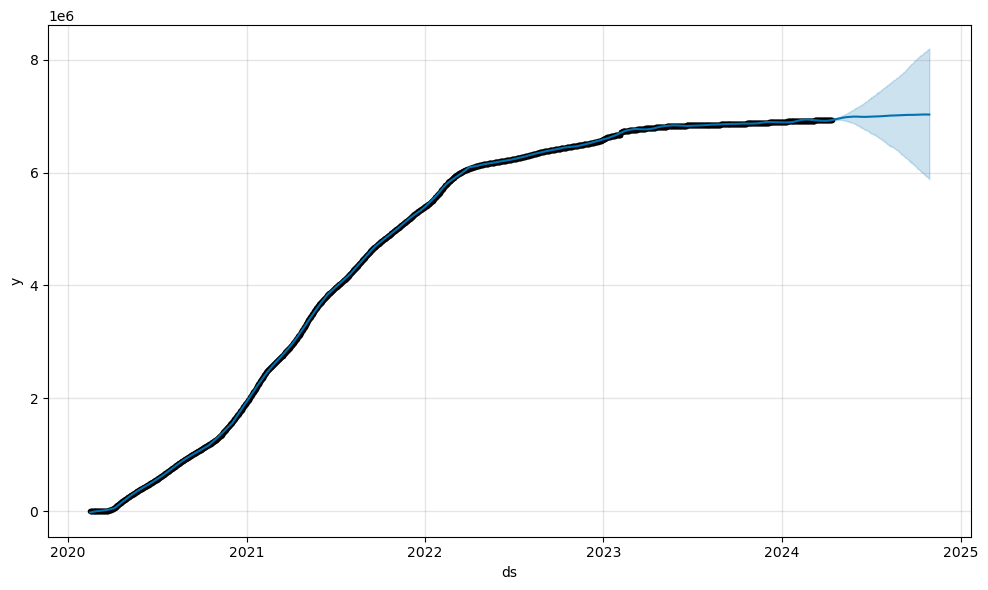

In [163]:
deaths_forecast_plot = m.plot(forecast_deaths)

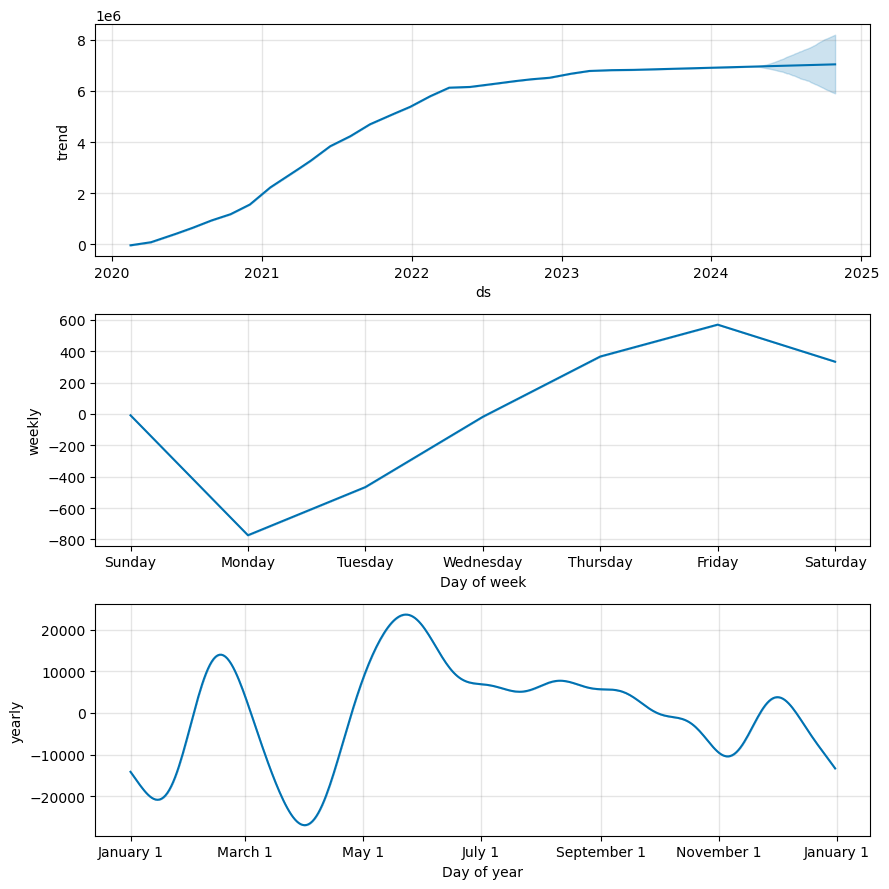

In [164]:
deaths_forecast_plot = m.plot_components(forecast_deaths)

#### 4.3 Frecasting Worldwide Recovered Cases with Prophet (Base model)

In [165]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [166]:
m = Prophet(interval_width = 0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods = 200)
future.tail()

17:05:48 - cmdstanpy - INFO - Chain [1] start processing
17:05:48 - cmdstanpy - INFO - Chain [1] done processing


,ds
1714,2024-10-25
1715,2024-10-26
1716,2024-10-27
1717,2024-10-28
1718,2024-10-29


In [167]:
forecast_recovered = m.predict(future)
forecast_recovered[['ds', 'yhat','yhat_lower','yhat_upper']].tail().apply(lambda x: x.dt.strftime('%Y-%m-%d') 
                                                    if x.name == 'ds' else x.apply('{:,.0f}'.format))

,ds,yhat,yhat_lower,yhat_upper
1714,2024-10-25,"630,146,576","464,819,662","823,238,238"
1715,2024-10-26,"630,101,185","463,701,226","826,422,545"
1716,2024-10-27,"630,038,096","460,899,762","824,862,974"
1717,2024-10-28,"630,048,340","460,293,741","831,312,243"
1718,2024-10-29,"630,107,571","455,766,225","828,635,973"


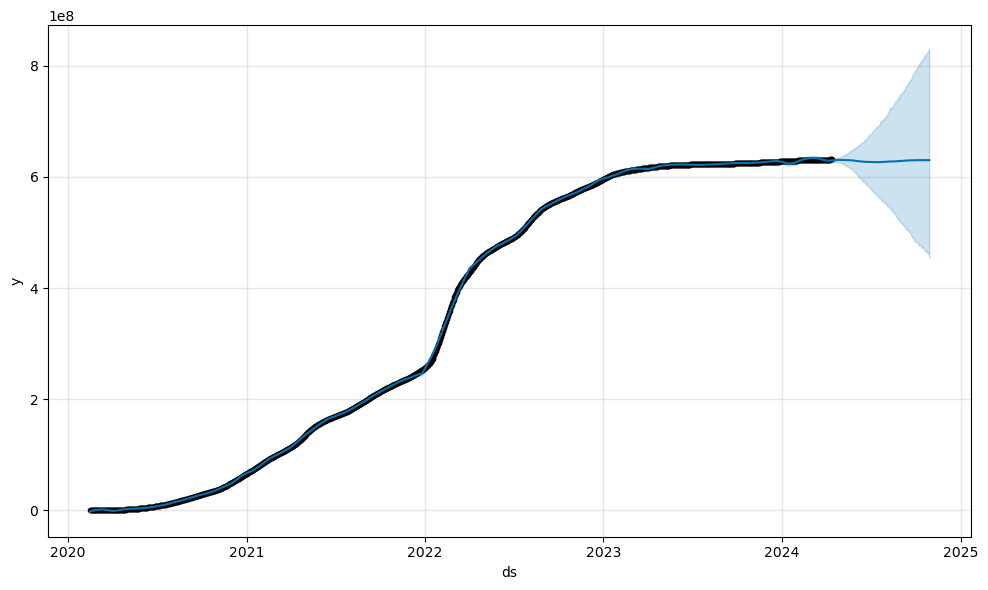

In [168]:
recovered_forecast_plot = m.plot(forecast_recovered)

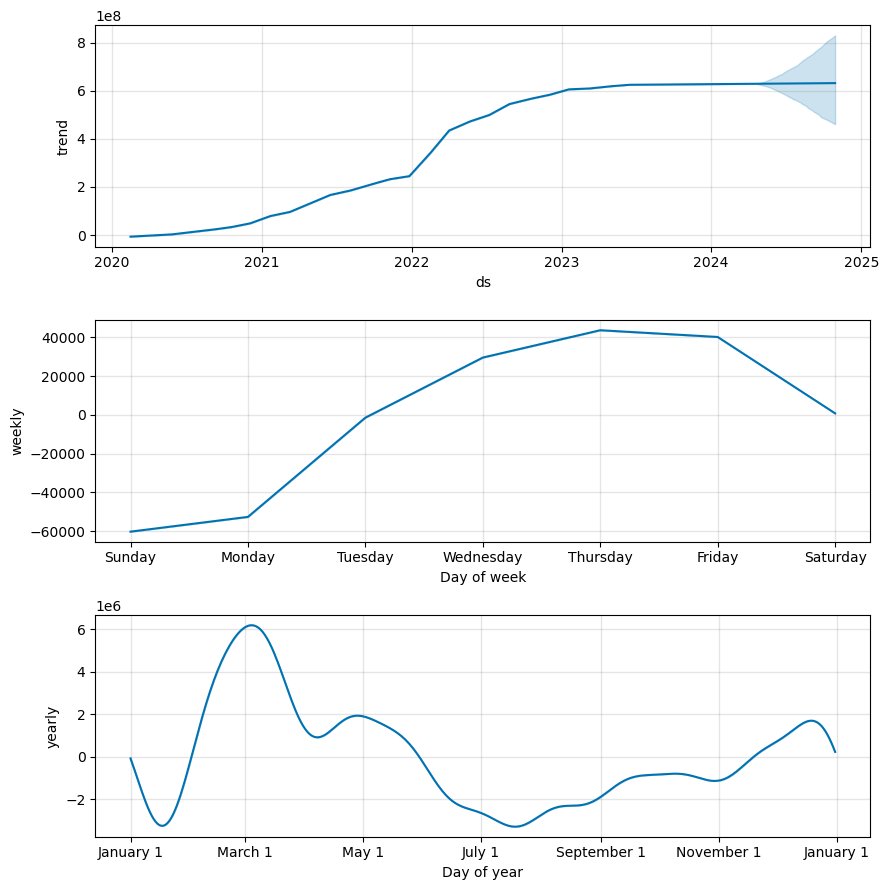

In [169]:
recovered_forecast_plot = m.plot_components(forecast_recovered)

### 5. Đánh giá mô hình

In [170]:
import numpy as np

# Hàm tính MAE
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Hàm tính RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính các phép đo đánh giá số ca nhiễm
mae_confirmed = mean_absolute_error(confirmed['y'], forecast_confirmed['yhat'])
rmse_confirmed = root_mean_squared_error(confirmed['y'], forecast_confirmed['yhat'])
mape_confirmed = mean_absolute_percentage_error(confirmed['y'], forecast_confirmed['yhat'])

# Hiển thị kết quả
evaluation_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE'],
    'Value': [mae_confirmed, rmse_confirmed, mape_confirmed]
})

print("Đánh giá mô hình dự đoán ca nhiễm")
evaluation_df


Đánh giá mô hình dự đoán ca nhiễm


,Metric,Value
0,MAE,1.300480e+06
1,RMSE,2.595057e+06
2,MAPE,1.097261e+01


In [171]:
import numpy as np

# Hàm tính MAE
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Hàm tính RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính các phép đo đánh giá số ca tử vong
mae_deaths = mean_absolute_error(deaths['y'], forecast_deaths['yhat'])
rmse_deaths = root_mean_squared_error(deaths['y'], forecast_deaths['yhat'])
mape_deaths = mean_absolute_percentage_error(deaths['y'], forecast_deaths['yhat'])

# Hiển thị kết quả
evaluation_df_deaths = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE'],
    'Value': [mae_deaths, rmse_deaths, mape_deaths]
})
print("Đánh giá mô hình dự đoán ca tử vong")
evaluation_df_deaths

Đánh giá mô hình dự đoán ca tử vong


,Metric,Value
0,MAE,6685.678128
1,RMSE,8680.279590
2,MAPE,8.205346


In [173]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import matplotlib.pyplot as plt

# # Xác định tham số ARIMA cho số ca nhiễm
# # Kiểm tra tính stationarity
# from statsmodels.tsa.stattools import adfuller

# def test_stationarity(timeseries):
#     # Kiểm tra rolling statistics
#     rolmean = timeseries.rolling(window=12).mean()
#     rolstd = timeseries.rolling(window=12).std()
    
#     # Vẽ đồ thị
#     orig = plt.plot(timeseries, color='blue',label='Original')
#     mean = plt.plot(rolmean, color='red', label='Rolling Mean')
#     std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.legend(loc='best')
#     plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
#     # Kiểm tra Dickey-Fuller:
#     print('Results of Dickey-Fuller Test:')
#     dftest = adfuller(timeseries, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print(dfoutput)

# # Xác định các tham số ARIMA
# def find_best_arima(ts):
#     best_rmse = np.inf
#     best_order = None
#     for p in range(3):
#         for d in range(3):
#             for q in range(3):
#                 try:
#                     model = ARIMA(ts, order=(p,d,q))
#                     results = model.fit()
#                     if results.aic < best_rmse:
#                         best_rmse = results.aic
#                         best_order = (p,d,q)
#                 except:
#                     continue
#     return best_order

# # Đọc dữ liệu và chuyển cột 'Date' thành index
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # Xây dựng mô hình ARIMA cho số ca nhiễm
# confirmed_series = df.groupby('Date').sum()['Confirmed']

# # Kiểm tra tính stationarity và xác định tham số ARIMA tốt nhất
# test_stationarity(confirmed_series)
# best_order = find_best_arima(confirmed_series)

# # Xây dựng mô hình ARIMA với tham số tốt nhất
# model = ARIMA(confirmed_series, order=best_order)
# arima_results = model.fit()

# # Dự đoán 7 ngày tiếp theo
# forecast = arima_results.forecast(steps=7)

# # Tính toán RMSE và MAE cho mô hình ARIMA
# actual_values = df.groupby('Date').sum()['Confirmed'][-7:]
# rmse_arima = np.sqrt(mean_squared_error(actual_values, forecast))
# mae_arima = mean_absolute_error(actual_values, forecast)

# print("RMSE of ARIMA model:", rmse_arima)
# print("MAE of ARIMA model:", mae_arima)
